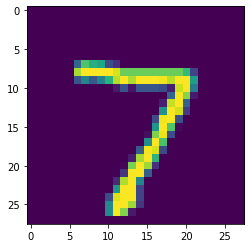

(10000, 28, 28)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 358us/sample - loss: 0.1989 - acc: 0.9422 - val_loss: 0.0718 - val_acc: 0.9777
Epoch 2/10
60000/60000 [==============================] - 23s 384us/sample - loss: 0.0583 - acc: 0.9826 - val_loss: 0.0669 - val_acc: 0.9796
Epoch 3/10
60000/60000 [==============================] - 22s 374us/sample - loss: 0.0354 - acc: 0.9894 - val_loss: 0.0553 - val_acc: 0.9819
Epoch 4/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0229 - acc: 0.9929 - val_loss: 0.0506 - val_acc: 0.9844
Epoch 5/10
60000/60000 [==============================] - 24s 397us/sample - loss: 0.0154 - acc: 0.9956 - val_loss: 0.0540 - val_acc: 0.9842
Epoch 6/10
60000/60000 [===

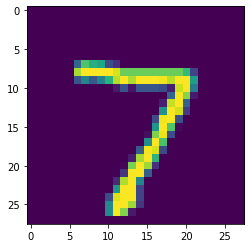

In [3]:
# keras imports for the dataset and building our neural network
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

# to calculate accuracy
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# loading the dataset
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
plt.imshow(X_test[0])
plt.show()
print(X_test.shape)
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = tensorflow.keras.utils.to_categorical(y_train, n_classes)
Y_test = tensorflow.keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

import matplotlib.pyplot as plt

X_test.shape

X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_test.shape

plt.imshow(X_test[0])

import cv2

In [48]:
img = cv2.imread('/home/abhishek/Desktop/34.png', cv2.IMREAD_GRAYSCALE)
img = 255 - img

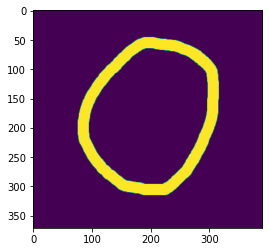

In [49]:
plt.imshow(img)

In [50]:
to_predict = []

In [51]:
img.shape

(371, 391)

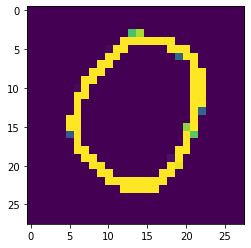

In [52]:
img = cv2.resize(img, (28, 28))
plt.imshow(img)
plt.show()

In [53]:
img.shape

(28, 28)

In [54]:
import numpy as np
to_predict.append(img)
to_predict = np.array(to_predict)
to_predict = to_predict.reshape(1, 28, 28, 1)
to_predict = to_predict.astype('float32')

In [55]:
print(to_predict[0].shape)

(28, 28, 1)


In [56]:
prediction = model.predict(to_predict)

In [57]:
print(prediction.argmax())

0


In [58]:
model.predict(to_predict)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)